# Imports, downloads, etc.

In [1]:
import requests
import nltk
from bs4 import BeautifulSoup


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Creating the dataframe from csv

In [45]:
import pandas as pd
#pd.set_option('display.max_colwidth', none)
url_file = 'https://raw.githubusercontent.com/MarissaFosse/ryersoncapstone/master/DailyNewsArticlesCSV.csv'

tstar_articles = pd.read_csv(url_file, header=0, usecols=["Date", "Category", "Publisher", "Heading", "URL"]) 

#tstar_articles.describe()
tstar_articles.head(90)

,Date,Category,Publisher,Heading,URL
0,2020-01-01,Violent Crime,The Star,"With 292 people shot, 2019 comes to a close as...",https://www.thestar.com/news/gta/2019/12/31/wi...
1,2020-01-01,Violent Crime,The Star,Two men shot overnight in North York,https://www.thestar.com/news/crime/2019/12/31/...
2,2020-01-01,Violent Crime,The Star,Six arrested after downtown home invasion on B...,https://www.thestar.com/news/gta/2019/12/31/si...
3,2020-01-04,Violent Crime,The Star,Toronto police ID last homicide victim of 2019...,https://www.thestar.com/news/crime/2020/01/02/...
4,2020-01-04,Traffic,The Star,SIU clears police after a car they initially c...,https://www.thestar.com/news/gta/2020/01/02/si...
...,...,...,...,...,...
85,2020-02-05,Missing Persons,The Star,Homicide victim Tess Richey’s friend describes...,https://www.thestar.com/news/gta/2020/02/04/te...
86,2020-02-06,Violent Crime,The Star,Scarborough’s Cedarbrae Collegiate Institute l...,https://www.thestar.com/news/gta/2020/02/05/sc...
87,2020-02-06,Missing Persons,The Star,Undercover cops discussed Magic: The Gathering...,https://www.thestar.com/news/gta/2020/02/05/un...
88,2020-02-07,Violent Crime,The Star,Man sustains ‘life-altering’ injuries after he...,https://www.thestar.com/news/gta/2020/02/06/ma...


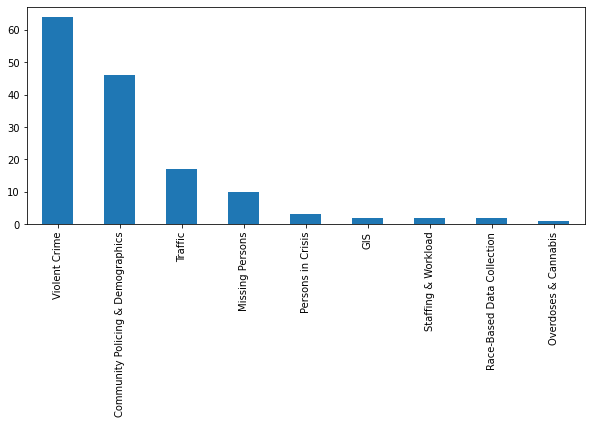

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,4))
tstar_articles.Category.value_counts().plot(kind='bar')

The categories are not well balanced. Thus, my classification algorithm will be designed to only predict Violent Crime and Community Policing & Demographics. Perhaps Traffic if I normalize the data. 

# Creating a list of the tokenized/lemmatized words from each artile and appending it to the dataframe

In [0]:
url_to_sents = {}

for url in tstar_articles['URL']:
    response = requests.get(url)
    bsoup = BeautifulSoup(response.content.decode('utf8'))
    if bsoup.find(class_='c-article-body__content'):
      article_sents = ' '.join([p.text for p in bsoup.find(class_='c-article-body__content').find_all('p')])
    url_to_sents[url] = article_sents

In [0]:
#url_to_sents

Append the extracted text to the tstar_articles dataframe.

In [46]:
urls, texts = zip(*url_to_sents.items())
data = {'urls':urls, 'text':texts}
df1 = pd.DataFrame.from_dict(data)

tstar_articles['raw text'] = df1['text']
tstar_articles.head()

,Date,Category,Publisher,Heading,URL,raw text
0,2020-01-01,Violent Crime,The Star,"With 292 people shot, 2019 comes to a close as...",https://www.thestar.com/news/gta/2019/12/31/wi...,Toronto’s bloodiest year for gun violence is c...
1,2020-01-01,Violent Crime,The Star,Two men shot overnight in North York,https://www.thestar.com/news/crime/2019/12/31/...,Toronto police are investigating after a 24-ye...
2,2020-01-01,Violent Crime,The Star,Six arrested after downtown home invasion on B...,https://www.thestar.com/news/gta/2019/12/31/si...,Six people have been arrested following a viol...
3,2020-01-04,Violent Crime,The Star,Toronto police ID last homicide victim of 2019...,https://www.thestar.com/news/crime/2020/01/02/...,Toronto police have identified the city’s last...
4,2020-01-04,Traffic,The Star,SIU clears police after a car they initially c...,https://www.thestar.com/news/gta/2020/01/02/si...,"It started in a Scarborough plaza, when Toront..."


In [0]:
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import random
from string import punctuation

For stop words, I used both the NLTK English stopwords, the stopwords-json from https://github.com/6/stopwords-json, and I created my own list specific to law enforcement.

In [0]:
stopwords_nltk = set(stopwords.words('english')) | set(punctuation)
stopwords_json = {"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
stopwords_police = ["a.m.","p.m.","near","“","”","’","police","officer","toronto","say","also","year"]
stoplist_combined = set.union(stopwords_nltk, stopwords_json, stopwords_police)

In [50]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
wnl = WordNetLemmatizer()

def penn2morphy(penntag):
  morphy_tag = {'NN':'n', 'JJ':'a', 'VB':'v', 'RB':'r'}
  try:
    return morphy_tag[penntag[:2]]
  except:
    return 'n'

def lemmatize_sent(text):
  return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(word_tokenize(text))]

In [0]:
def preprocess_text(text):
  return [word for word in lemmatize_sent(text) if word not in stoplist_combined and not word.isdigit()]

In [0]:
tstar_articles['Cleaned_Tokens'] = tstar_articles['raw text'].apply(preprocess_text)

In [118]:
tstar_articles.head(20)

,Date,Category,Publisher,Heading,URL,raw text,Cleaned_Tokens
0,2020-01-01,Violent Crime,The Star,"With 292 people shot, 2019 comes to a close as...",https://www.thestar.com/news/gta/2019/12/31/wi...,Toronto’s bloodiest year for gun violence is c...,"[bloody, gun, violence, come, close, start, ea..."
1,2020-01-01,Violent Crime,The Star,Two men shot overnight in North York,https://www.thestar.com/news/crime/2019/12/31/...,Toronto police are investigating after a 24-ye...,"[investigate, 24-year-old, man, 17-year-old, b..."
2,2020-01-01,Violent Crime,The Star,Six arrested after downtown home invasion on B...,https://www.thestar.com/news/gta/2019/12/31/si...,Six people have been arrested following a viol...,"[six, people, arrest, follow, violent, home, i..."
3,2020-01-04,Violent Crime,The Star,Toronto police ID last homicide victim of 2019...,https://www.thestar.com/news/crime/2020/01/02/...,Toronto police have identified the city’s last...,"[identify, city, last, homicide, victim, man, ..."
4,2020-01-04,Traffic,The Star,SIU clears police after a car they initially c...,https://www.thestar.com/news/gta/2020/01/02/si...,"It started in a Scarborough plaza, when Toront...","[start, scarborough, plaza, go, question, pass..."
5,2020-01-05,Traffic,The Star,Man dead following hit-and-run at Jarvis and G...,https://www.thestar.com/news/gta/2020/01/04/ma...,A 65-year-old man has died after being struck ...,"[65-year-old, man, die, strike, driver, vehicl..."
6,2020-01-07,Community Policing & Demographics,The Star,Mornelle Court residents took ‘our community b...,https://www.thestar.com/news/gta/2020/01/06/mo...,When Angela Brackett convinced her Mornelle Co...,"[angela, brackett, convince, mornelle, court, ..."
7,2020-01-07,Community Policing & Demographics,The Star,Do you recognize this dog? She was found zippe...,https://www.thestar.com/news/gta/2020/01/06/do...,Toronto police are appealing for more informat...,"[appeal, information, dog, find, abandon, zip,..."
8,2020-01-07,Community Policing & Demographics,The Star,City hall security upgrades could include meta...,https://www.thestar.com/news/gta/2020/01/06/ci...,Public access to Toronto City Hall could soon ...,"[public, access, city, hall, could, soon, incl..."
9,2020-01-07,Race-Based Data Collection,The Star,Black youth more likely to be charged and less...,https://www.thestar.com/news/gta/2020/01/06/bl...,Young Black people were less likely than white...,"[young, black, people, less, likely, white, yo..."


In [113]:
tstar_articles['raw text'].apply(lambda x: len(x.split(' '))).sum()

78475

In [115]:
tstar_articles['Cleaned_Tokens'].apply(lambda x: len(x.split(' '))).sum()

AttributeError: ignored

Testing various sets of cleaned_tokens to see which words should be stopped, and see what the data looks like.

In [0]:
freq = nltk.FreqDist(tstar_articles.iloc[6,6])
for key,val in freq.items():
  print(str(key) + ':' + str(val))

freq.plot(20, cumulative=False)

# Vectorization

In [0]:
from collections import Counter

In [103]:
sent1 = tstar_articles.iloc[0,6]
sent2 = tstar_articles.iloc[1,6]

print(Counter(sent1))
print(Counter(sent2))

Counter({'gun': 14, 'violence': 9, 'shooting': 7, 'city': 5, 'mayor': 5, 'continue': 4, 'kill': 4, 'project': 4, 'shoot': 3, 'avenue': 3, 'victim': 3, 'people': 3, 'record': 3, 'address': 3, 'community': 3, 'saunders': 3, 'lead': 3, 'come': 2, 'early': 2, 'man': 2, 'road': 2, 'rush': 2, 'day': 2, 'finch': 2, 'new': 2, 'eve': 2, 'men': 2, 'hospital': 2, 'set': 2, 'increase': 2, 'saw': 2, 'total': 2, 'overall': 2, 'time': 2, 'glen': 2, 'tory': 2, 'gang': 2, 'include': 2, 'investment': 2, 'federal': 2, 'government': 2, 'chief': 2, 'emphasize': 2, 'strategic': 2, 'result': 2, 'homicide': 2, 'bloody': 1, 'close': 1, 'start': 1, 'jan.': 1, 'oakwood': 1, 'vaughan': 1, 'trauma': 1, 'centre': 1, 'survive': 1, 'last': 1, 'double': 1, 'jane': 1, 'street': 1, 'west': 1, 'hour': 1, 'another': 1, 'shot': 1, 'evening': 1, 'two': 1, 'first': 1, 'serious': 1, 'condition': 1, 'second': 1, 'die': 1, 'scarborough': 1, 'neilson': 1, 'crow': 1, 'trail': 1, 'east': 1, 'injure': 1, 'previous': 1, 'data': 1, '

In [0]:
from io import StringIO
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(sent1)
print(vectorizer.vocabulary_)
vector = vectorizer.transform(sent1)
#print(vector)
print(vector.shape)
print(type(vector))
print(vector.toarray())


# TF-IDF

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(sent1)
print(tfidf.vocabulary_)
print(tfidf.idf_)
vector = tfidf.transform([sent1[0]])
print(vector.shape)
print(vector.toarray())


{'bloody': 25, 'gun': 96, 'violence': 210, 'come': 39, 'close': 36, 'start': 188, 'early': 62, 'jan': 111, 'man': 123, 'shoot': 179, 'oakwood': 138, 'avenue': 21, 'vaughan': 208, 'road': 167, 'rush': 169, 'trauma': 204, 'centre': 31, 'survive': 194, 'continue': 45, 'last': 115, 'day': 50, 'double': 58, 'shooting': 180, 'jane': 112, 'street': 191, 'finch': 80, 'west': 214, 'hour': 102, 'new': 134, 'eve': 69, 'another': 14, 'shot': 181, 'kill': 114, 'evening': 71, 'two': 205, 'victim': 209, 'first': 82, 'men': 127, 'hospital': 101, 'serious': 176, 'condition': 43, 'second': 173, 'die': 54, 'scarborough': 172, 'neilson': 133, 'crow': 48, 'trail': 203, 'east': 63, 'people': 148, 'injure': 107, 'city': 35, 'previous': 153, 'set': 177, 'record': 160, 'data': 49, 'go': 90, 'back': 22, 'despite': 53, 'per': 149, 'cent': 30, 'increase': 105, 'number': 137, 'compare': 41, 'saw': 171, 'seven': 178, 'expert': 73, 'combined': 38, 'total': 200, 'injury': 108, 'death': 51, 'good': 91, 'measure': 126,

# Word2Vec

# Trying Naive Bayes Classifier

In [0]:
mf_categories = ['Violent Crime','Community Policing & Demographics','Traffic','Other']

In [0]:
x = tstar_articles.Cleaned_Tokens
y = tstar_articles.Category

x_train, x_test, y_train, y_test = train_test_split(x, y, testsize=0.2)

In [111]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline(['vect', CountVectorizer(),
               'tfidf', TfidfTransformer(),
               'clf', MultinomialNB()])
nb.fit(x_train, y_train)

%%time

from sklearn.metrics import classification_report

y_pred = nb.predict(x_text)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names=mf_categories))


TypeError: ignored

In [0]:
train, valid = train_test_split(tstar_articles, test_size=0.2)

count_vect = CountVectorizer(analyzer=preprocess_text)

train_set = count_vect.fit_transform(train['raw text'])
train_tags = train['Category']

valid_set = count_vect.transform(valid['raw text'])
valid_tags = valid['Category']

#test_set = count_vect.transform(df_test['request_text_edit_aware'])

# Testing, practice code, etc.

The below code is my own compilation to get all the text from the various articles. Above, is code from StackOverflow which helped me clean up my code. The only difference is the above captures only p tags, while below captures all text from the c-article-body__content tag, meaning the above won't capture list items. 

In [15]:
url_to_sents = {}

for url in tstar_articles['URL']:
  page = requests.get(url)
  soup = BeautifulSoup(page.content, 'html.parser')
  if soup.find(class_='c-article-body__content'):
    results = soup.find(class_='c-article-body__content')
  results_text = [tag.get_text().strip() for tag in results]
  sentence_list = [sentence for sentence in results_text if not '\n' in sentence]
  sentence_list = [sentence for sentence in sentence_list if '.' in sentence]
  article = ' '.join(sentence_list)
  url_to_sents[url] = article

#print(url_to_sents)

{'https://www.thestar.com/news/gta/2019/12/31/with-291-people-shot-2019-is-closing-as-torontos-bloodiest-year-on-record-for-overall-gun-violence.html': "Toronto’s bloodiest year for gun violence is coming to a close. It started early on Jan. 1, 2019, when a man was shot at Oakwood Avenue and Vaughan Road. He was rushed to a trauma centre and survived. And the violence continued until the last day of the year, with a double shooting near Jane Street and Finch Avenue West in the early hours of New Year’s Eve, and another man shot and killed in the evening. The two victims of the first shooting, both men, were rushed to hospital in serious condition. The victim of the second died in hospital after being shot in Scarborough at Neilson Road and Crow Trail, near Finch Avenue East. As of 9 p.m. on New Year’s Eve, 292 people had been  killed or injured in shootings in the city, 56 more than the previous year, which itself set a record for the most people shot in police data that goes back 15 y

In [0]:
#URL = 'https://www.thestar.com/news/gta/2019/12/31/with-291-people-shot-2019-is-closing-as-torontos-bloodiest-year-on-record-for-overall-gun-violence.html'

In [6]:
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
soup.title.text

'With 292 people shot, 2019 comes to a close as Toronto’s bloodiest year on record for overall gun violence | The Star'

Code below works for Toronto Star articles. Try to modify for Toronto Sun too.

In [7]:
results = soup.find(class_='c-article-body__content') 
#print(results.prettify())
results_text = [tag.get_text().strip() for tag in results]
sentence_list = [sentence for sentence in results_text if not '\n' in sentence]
sentence_list = [sentence for sentence in sentence_list if '.' in sentence]
article = ' '.join(sentence_list)
print(article)

Toronto’s bloodiest year for gun violence is coming to a close. It started early on Jan. 1, 2019, when a man was shot at Oakwood Avenue and Vaughan Road. He was rushed to a trauma centre and survived. And the violence continued until the last day of the year, with a double shooting near Jane Street and Finch Avenue West in the early hours of New Year’s Eve, and another man shot and killed in the evening. The two victims of the first shooting, both men, were rushed to hospital in serious condition. The victim of the second died in hospital after being shot in Scarborough at Neilson Road and Crow Trail, near Finch Avenue East. As of 9 p.m. on New Year’s Eve, 292 people had been  killed or injured in shootings in the city, 56 more than the previous year, which itself set a record for the most people shot in police data that goes back 15 years. Despite a more than 20 per cent increase in the number of shootings compared to 2018, this year saw seven fewer people killed by guns. Experts say 

In [0]:
tokens = [t for t in article.split()]
print(tokens)

['Toronto’s', 'bloodiest', 'year', 'for', 'gun', 'violence', 'is', 'coming', 'to', 'a', 'close.', 'It', 'started', 'early', 'on', 'Jan.', '1,', '2019,', 'when', 'a', 'man', 'was', 'shot', 'at', 'Oakwood', 'Avenue', 'and', 'Vaughan', 'Road.', 'He', 'was', 'rushed', 'to', 'a', 'trauma', 'centre', 'and', 'survived.', 'And', 'the', 'violence', 'continued', 'until', 'the', 'last', 'day', 'of', 'the', 'year,', 'with', 'a', 'double', 'shooting', 'near', 'Jane', 'Street', 'and', 'Finch', 'Avenue', 'West', 'in', 'the', 'early', 'hours', 'of', 'New', 'Year’s', 'Eve,', 'and', 'another', 'man', 'shot', 'and', 'killed', 'in', 'the', 'evening.', 'The', 'two', 'victims', 'of', 'the', 'first', 'shooting,', 'both', 'men,', 'were', 'rushed', 'to', 'hospital', 'in', 'serious', 'condition.', 'The', 'victim', 'of', 'the', 'second', 'died', 'in', 'hospital', 'after', 'being', 'shot', 'in', 'Scarborough', 'at', 'Neilson', 'Road', 'and', 'Crow', 'Trail,', 'near', 'Finch', 'Avenue', 'East.', 'As', 'of', '9', '

In [0]:
from nltk.tokenize import sent_tokenize, word_tokenize
print(word_tokenize(article))

['Toronto', '’', 's', 'bloodiest', 'year', 'for', 'gun', 'violence', 'is', 'coming', 'to', 'a', 'close', '.', 'It', 'started', 'early', 'on', 'Jan.', '1', ',', '2019', ',', 'when', 'a', 'man', 'was', 'shot', 'at', 'Oakwood', 'Avenue', 'and', 'Vaughan', 'Road', '.', 'He', 'was', 'rushed', 'to', 'a', 'trauma', 'centre', 'and', 'survived', '.', 'And', 'the', 'violence', 'continued', 'until', 'the', 'last', 'day', 'of', 'the', 'year', ',', 'with', 'a', 'double', 'shooting', 'near', 'Jane', 'Street', 'and', 'Finch', 'Avenue', 'West', 'in', 'the', 'early', 'hours', 'of', 'New', 'Year', '’', 's', 'Eve', ',', 'and', 'another', 'man', 'shot', 'and', 'killed', 'in', 'the', 'evening', '.', 'The', 'two', 'victims', 'of', 'the', 'first', 'shooting', ',', 'both', 'men', ',', 'were', 'rushed', 'to', 'hospital', 'in', 'serious', 'condition', '.', 'The', 'victim', 'of', 'the', 'second', 'died', 'in', 'hospital', 'after', 'being', 'shot', 'in', 'Scarborough', 'at', 'Neilson', 'Road', 'and', 'Crow', 'Tra

In [0]:
word_tokens = word_tokenize(article_sents)
word_tokens

In [0]:
from string import punctuation

word_tokens = word_tokenize(article)

stopwords_nltk = set(stopwords.words('english')) | set(punctuation)
stopwords_json = {"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
stoplist_combined = set.union(stopwords_nltk, stopwords_json)

#def preprocess(article):
#    return [word for word in word_tokenize(text) if word not in stoplist_combined and not word.isdigit()]

#text = url_to_sents['https://www.thestar.com/news/crime/2020/05/12/man-in-critical-condition-after-being-shot-multiple-times-in-etobicoke.html']

#preprocess(article.lower())

filtered_article = [w for w in word_tokens if not w in stoplist_combined]
filtered_sentence = []

for w in word_tokens:
  if w not in stoplist_combined:
    filtered_sentence.append(w)

print(filtered_sentence)

['Toronto', '’', 'bloodiest', 'year', 'gun', 'violence', 'coming', 'close', 'It', 'started', 'early', 'Jan.', '1', '2019', 'man', 'shot', 'Oakwood', 'Avenue', 'Vaughan', 'Road', 'He', 'rushed', 'trauma', 'centre', 'survived', 'And', 'violence', 'continued', 'last', 'day', 'year', 'double', 'shooting', 'near', 'Jane', 'Street', 'Finch', 'Avenue', 'West', 'early', 'hours', 'New', 'Year', '’', 'Eve', 'another', 'man', 'shot', 'killed', 'evening', 'The', 'two', 'victims', 'first', 'shooting', 'men', 'rushed', 'hospital', 'serious', 'condition', 'The', 'victim', 'second', 'died', 'hospital', 'shot', 'Scarborough', 'Neilson', 'Road', 'Crow', 'Trail', 'near', 'Finch', 'Avenue', 'East', 'As', '9', 'p.m.', 'New', 'Year', '’', 'Eve', '292', 'people', 'killed', 'injured', 'shootings', 'city', '56', 'previous', 'year', 'set', 'record', 'people', 'shot', 'police', 'data', 'goes', 'back', '15', 'years', 'Despite', '20', 'per', 'cent', 'increase', 'number', 'shootings', 'compared', '2018', 'year', 's

Toronto’s:1
bloodiest:1
year:4
gun:11
violence:7
coming:1
close.:1
It:1
started:1
early:3
Jan.:3
1,:1
2019,:1
man:4
shot:48
Oakwood:3
Avenue:17
Vaughan:3
Road.:1
He:8
rushed:2
trauma:1
centre:1
survived.:1
And:1
continued:1
last:1
day:3
year,:2
double:2
shooting:4
near:37
Jane:5
Street:3
Finch:4
West:6
hours:1
New:3
Year’s:3
Eve,:2
another:2
killed:5
evening.:1
The:6
two:5
victims:1
first:2
shooting,:1
men,:1
hospital:7
serious:1
condition.:1
victim:2
second:1
died:10
Scarborough:5
Neilson:2
Road:10
Crow:2
Trail,:1
East.:1
As:1
9:2
p.m.:13
292:1
people:4
injured:1
shootings:4
city,:2
56:1
previous:1
set:2
record:5
police:12
data:1
goes:1
back:1
15:3
years.:1
Despite:1
20:1
per:1
cent:1
increase:2
number:1
compared:1
2018,:2
saw:2
seven:1
fewer:1
guns.:1
Experts:1
say:3
combined:1
total:2
injuries:1
deaths:1
better:1
measure:1
overall:2
fatal:1
alone,:1
part:1
whether:1
lives:1
dies:1
decided:1
factors:1
like:1
health:1
care,:1
time:2
random:1
chance.:1
In:4
emailed:1
statement,:1
Court

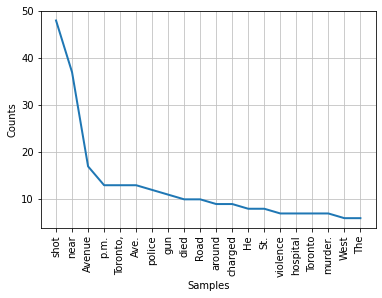

In [0]:
clean_tokens = tokens[:]

for token in tokens:
  if token in stopwords.words('english'):
    
    clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
  print(str(key) + ':' + str(val))

freq.plot(20, cumulative=False)

Building the dataframe: tstar_articles

In [0]:
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

#documents = []
#for category in movie_reviews.categories():
#   for fileid in movie_reviews.fileids(category):
#     documents.append(movie_reviews.words(fileid), category)


random.shuffle(documents)

#print(documents[1])

all_words = []
for w in movie_reviews.words():
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:3000]

def find_features(document):
  words = set(document) #a set is one iteration of all words
  features = {}
  for w in word_features:
    features[w] = (w in words)
  return features

print((find_features(movie_reviews.words('neg/cv000_29416.txt'))))

featuresets = [(find_features(rev), category) for (rev, category) in documents]

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
{'plot': True, ':': True, 'two': True, 'teen': True, 'couples': True, 'go': True, 'to': True, 'a': True, 'church': True, 'party': True, ',': True, 'drink': True, 'and': True, 'then': True, 'drive': True, '.': True, 'they': True, 'get': True, 'into': True, 'an': True, 'accident': True, 'one': True, 'of': True, 'the': True, 'guys': True, 'dies': True, 'but': True, 'his': True, 'girlfriend': True, 'continues': True, 'see': True, 'him': True, 'in': True, 'her': True, 'life': True, 'has': True, 'nightmares': True, 'what': True, "'": True, 's': True, 'deal': True, '?': True, 'watch': True, 'movie': True, '"': True, 'sorta': True, 'find': True, 'out': True, 'critique': True, 'mind': True, '-': True, 'fuck': True, 'for': True, 'generation': True, 'that': True, 'touches': True, 'on': True, 'very': True, 'cool': True, 'idea': True, 'presents': True, 'it': True, 'bad': Tr

In [0]:
training_set = featuresets[:1900] #up to but not including 1900'th review
testing_set = featuresets[1900:]

classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)